Marcos Gonzalez  
Homework #4  
2/15/21

### Homework 4

The made-up data file (attached in Blackboard and URL below) contains information about sales at an auction.  This data file is a tab separated file. 

URL: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/HW4_made-up_data.txtcontains](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/HW4_made-up_data.txt) 

Do the following, which will require cleaning the data first:
1. create a bar chart of the furniture type column with the categories chair, table, mirror, and bed frame (that is, all chairs should be grouped together)
2. create a histogram of the price column
3. compute the mean of the bidder's numbers.

There are no questions to answer.

### Cleaning the data

- Cleaning and loading the txt file

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv("HW4_made-up_data.txt", skiprows = 2, sep = "\t")

In [13]:
df

,lot number,type,price,bidder
0,1,wing chair,"1,270",#4
1,2,table,"3,455",#88
2,3,armchair,"1,010",#56
3,4,mirror,734,#56
4,5,rocking chair,890,#50
5,5,rocking chair,890,#50
6,6,table,"2,780",#1
7,7,bed frame,"4,500",#4
8,8,chair,400,#4
9,9,table,"6,600",#2


- Renaming columns

In [14]:
new_columns = ["Lot_Number","Type","Price","Bidder"]
df.columns = new_columns
df

,Lot_Number,Type,Price,Bidder
0,1,wing chair,"1,270",#4
1,2,table,"3,455",#88
2,3,armchair,"1,010",#56
3,4,mirror,734,#56
4,5,rocking chair,890,#50
5,5,rocking chair,890,#50
6,6,table,"2,780",#1
7,7,bed frame,"4,500",#4
8,8,chair,400,#4
9,9,table,"6,600",#2


- Removing duplicate rows 

In [15]:
dup_filter = df.duplicated()
df[dup_filter]

,Lot_Number,Type,Price,Bidder
5,5,rocking chair,890,#50


In [16]:
df = df.drop_duplicates()
df

,Lot_Number,Type,Price,Bidder
0,1,wing chair,"1,270",#4
1,2,table,"3,455",#88
2,3,armchair,"1,010",#56
3,4,mirror,734,#56
4,5,rocking chair,890,#50
6,6,table,"2,780",#1
7,7,bed frame,"4,500",#4
8,8,chair,400,#4
9,9,table,"6,600",#2
10,10,armchair,"4,230",#50


- Standardizing categories

In [17]:
type_map = {"wing chair":"chair", "armchair":"chair", "rocking chair":"chair", "chair":"chair", "table":"table", "mirror":"mirror", "bed frame":"bed frame"}
df["Type"] = df["Type"].map(type_map)
df

<ipython-input-17-d3c38d1da8b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type"] = df["Type"].map(type_map)


,Lot_Number,Type,Price,Bidder
0,1,chair,"1,270",#4
1,2,table,"3,455",#88
2,3,chair,"1,010",#56
3,4,mirror,734,#56
4,5,chair,890,#50
6,6,table,"2,780",#1
7,7,bed frame,"4,500",#4
8,8,chair,400,#4
9,9,table,"6,600",#2
10,10,chair,"4,230",#50


- Removing characters and symbols

In [18]:
df["Price"] = df["Price"].str.replace(",","")
df

<ipython-input-18-de532c4ce1b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = df["Price"].str.replace(",","")


,Lot_Number,Type,Price,Bidder
0,1,chair,1270,#4
1,2,table,3455,#88
2,3,chair,1010,#56
3,4,mirror,734,#56
4,5,chair,890,#50
6,6,table,2780,#1
7,7,bed frame,4500,#4
8,8,chair,400,#4
9,9,table,6600,#2
10,10,chair,4230,#50


In [19]:
df["Bidder"] = df["Bidder"].str.replace("#","")
df

<ipython-input-19-5abd25d403b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bidder"] = df["Bidder"].str.replace("#","")


,Lot_Number,Type,Price,Bidder
0,1,chair,1270,4
1,2,table,3455,88
2,3,chair,1010,56
3,4,mirror,734,56
4,5,chair,890,50
6,6,table,2780,1
7,7,bed frame,4500,4
8,8,chair,400,4
9,9,table,6600,2
10,10,chair,4230,50


- Changing column types

In [20]:
df.dtypes

Lot_Number     int64
Type          object
Price         object
Bidder        object
dtype: object

In [21]:
df["Price"] = df["Price"].astype(int)
df["Bidder"] = df["Bidder"].astype(int)

<ipython-input-21-aa8c4177c584>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = df["Price"].astype(int)
<ipython-input-21-aa8c4177c584>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bidder"] = df["Bidder"].astype(int)


In [22]:
df.dtypes

Lot_Number     int64
Type          object
Price          int64
Bidder         int64
dtype: object

### 1. Bar chart

Text(0.5, 1.0, 'Number of Furniture by Type')

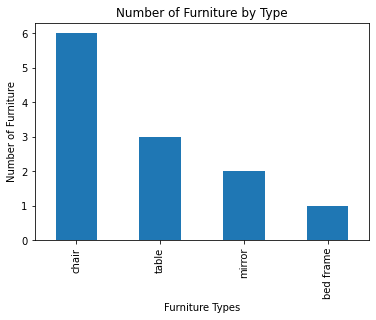

In [24]:
df["Type"].value_counts().plot(kind = "bar")
plt.xlabel("Furniture Types")
plt.ylabel("Number of Furniture")
plt.title("Number of Furniture by Type")

### 2. Histogram

Text(0.5, 1.0, 'Price of Items')

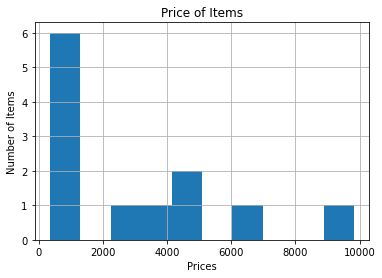

In [28]:
df["Price"].hist()
plt.xlabel("Prices")
plt.ylabel("Number of Items")
plt.title("Price of Items")

### 3. Mean

In [30]:
df["Bidder"].mean()

33.916666666666664